In [1]:
import anndata as an
import scanpy as sc
import scarches as sca
import numpy as np

c:\Users\Mick\PycharmProjects\BPEXA\in_house_data\venv\in-house\.venv\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
c:\Users\Mick\PycharmProjects\BPEXA\in_house_data\venv\in-house\.venv\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
c:\Users\Mick\PycharmProjects\BPEXA\in_house_data\venv\in-house\.venv\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
c:\Users\Mick\PycharmProjects\BPEXA\in_house_data\venv\in-house\.venv\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWar

In [2]:
import torch
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

In [3]:
hips = an.read_h5ad("dataset/tyser.h5ad") 

Converting dataset

In [86]:
#for col in hips.obs.columns:
#    if hips.obs[col].dtype == np.float32:
#        hips.obs[col] = hips.obs[col].astype(np.int64)
#    if hips.obs[col].dtype == np.int32:
#        hips.obs[col] = hips.obs[col].astype(np.int64)
#hips.X.astype(np.int64)

In [87]:
for i in hips.obs:
    print(type(hips.obs[i][0]))

<class 'str'>
<class 'numpy.float64'>
<class 'numpy.int32'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'numpy.int32'>


In [6]:
sca.utils.add_annotations(hips,"metadata/reactome.gmt", min_genes=12, clean=True)

In [45]:
hips._inplace_subset_var(hips.varm["I"].sum(1)>0)


In [49]:
hips.varm

AxisArrays with keys: I, PCs

In [8]:
sc.pp.normalize_total(hips)

In [9]:
sc.pp.log1p(hips)
hips.obs

,orig.ident,nCount_RNA,nFeature_RNA,Source.Name,Characteristics.sampling.site.,Characteristics.inferred.cell.type...authors.labels.,Characteristics.inferred.cell.type...ontology.labels.,cluster_id,sub_cluster,origin,run,sample_name,timepoint,percent.mt
SS.sc7786612,0,259888.990001,6942,SS.sc7786612,rostral,endodermal cell,endodermal cell,Endoderm,DE(P),tyser,tyser,tyser,tyser,1.304482
SS.sc7786605,0,437911.014986,6140,SS.sc7786605,rostral,advanced mesoderm,mesoderm cell,Advanced Mesoderm,Advanced Mesoderm,tyser,tyser,tyser,tyser,1.295160
SS.sc7785737,0,322351.983054,3800,SS.sc7785737,caudal,primitive streak,primitive streak cell,Primitive Streak,Primitive Streak,tyser,tyser,tyser,tyser,1.294179
SS.sc7785398,0,394318.996000,2964,SS.sc7785398,yolk sac,yolk sac mesoderm,mesenchyme of yolk sac,ExE Mesoderm,YS Mesoderm,tyser,tyser,tyser,tyser,1.423720
SS.sc7788091,0,298217.993000,5030,SS.sc7788091,caudal,axial mesoderm,chordamesodermal cell,Axial Mesoderm,Axial Mesoderm,tyser,tyser,tyser,tyser,1.327328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS.sc7785965,0,226569.027995,6361,SS.sc7785965,caudal,epiblast cell,epiblast cell,Epiblast,Epiblast,tyser,tyser,tyser,tyser,1.675409
SS.sc7788259,0,353921.980998,4647,SS.sc7788259,caudal,primitive streak,primitive streak cell,Primitive Streak,Primitive Streak,tyser,tyser,tyser,tyser,1.615045
SS.sc7786123,0,366998.009999,2822,SS.sc7786123,caudal,primitive streak,primitive streak cell,Primitive Streak,Primitive Streak,tyser,tyser,tyser,tyser,1.602395
SS.sc7786212,0,459601.642974,6110,SS.sc7786212,caudal,epiblast cell,epiblast cell,Epiblast,Epiblast,tyser,tyser,tyser,tyser,1.150624


In [10]:
sc.pp.highly_variable_genes(
    hips,
    n_top_genes=2000,
    batch_key="sample_name",
    subset=True
)

In [11]:
select_terms = hips.varm["I"].sum(0)>12
hips.uns['terms'] = np.array(hips.uns['terms'])[select_terms].tolist()
hips.varm['I'] = hips.varm['I'][:, select_terms]
hips._inplace_subset_var(hips.varm['I'].sum(1)>0)
#hips.Y = hips.obsp["distances"].copy()

In [12]:
hips

AnnData object with n_obs × n_vars = 1069 × 1977
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Source.Name', 'Characteristics.sampling.site.', 'Characteristics.inferred.cell.type...authors.labels.', 'Characteristics.inferred.cell.type...ontology.labels.', 'cluster_id', 'sub_cluster', 'origin', 'run', 'sample_name', 'timepoint', 'percent.mt'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'terms', 'log1p', 'hvg'
    varm: 'I'

In [13]:
for i in hips.obs:
    print(hips.obs[i].values)


[0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0]
[259888.99 437911.01 322351.98 394319.   298217.99 362622.   454114.95 ...
 519019.98 416504.97 226569.03 353921.98 366998.01 459601.64 349231.99]
[6942 6140 3800 2964 5030 4259 3842 ... 4486 5224 6361 4647 2822 6110 5612]
['SS.sc7786612' 'SS.sc7786605' 'SS.sc7785737' 'SS.sc7785398'
 'SS.sc7788091' 'SS.sc7785785' 'SS.sc7785959' ... 'SS.sc7786751'
 'SS.sc7785318' 'SS.sc7785965' 'SS.sc7788259' 'SS.sc7786123'
 'SS.sc7786212' 'SS.sc7785932']
['rostral', 'rostral', 'caudal', 'yolk sac', 'caudal', ..., 'caudal', 'caudal', 'caudal', 'caudal', 'caudal']
Length: 1069
Categories (3, object): ['caudal', 'rostral', 'yolk sac']
['endodermal cell', 'advanced mesoderm', 'primitive streak', 'yolk sac mesoderm', 'axial mesoderm', ..., 'epiblast cell', 'primitive streak', 'primitive streak', 'epiblast cell', 'nascent mesoderm']
Length: 1069
Categories (11, object): ['advanced mesoderm', 'axial mesoderm', 'ectodermal cell', 'emergent mesoderm', ..., 'hemogenic endothelia

In [20]:
intr_cvae = sca.models.EXPIMAP(
    adata=hips,
    condition_key='Characteristics.inferred.cell.type...authors.labels.',
    hidden_layer_sizes=[256, 256, 256],
    #use_mmd=False,
    recon_loss='nb',
    mask=hips.varm['I'].T,
    #use_decoder_relu=False,
    #mmd_instead_kl=False
)



INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 1977 256 11
	Hidden Layer 1 in/out: 256 256
	Hidden Layer 2 in/out: 256 256
	Mean/Var Layer in/out: 256 224
Decoder Architecture:
	Masked linear layer in, ext_m, ext, cond, out:  224 0 0 11 1977
	with hard mask.
Last Decoder layer: softmax


In [21]:
hips.X = hips.X.astype(np.float32)

In [22]:
early_stopping_kwargs = {
    "early_stopping_metric": "val_unweighted_loss", # val_unweighted_loss
    "threshold": 0,
    "patience": 50,
    "reduce_lr": True,
    "lr_patience": 13,
    "lr_factor": 0.1,
}

In [23]:
ALPHA = 0.7
OMEGA = None

In [24]:

intr_cvae.train(
    n_epochs=400, 
    alpha_epoch_anneal=100, 
    alpha=ALPHA, 
    omega=OMEGA,
    alpha_kl=0.5,
    weight_decay=0., 
    early_stopping_kwargs=early_stopping_kwargs,
    use_early_stopping=True,
    seed=2020
)

Preparing (1069, 1977)
Instantiating dataset
Init the group lasso proximal operator for the main terms.
 |████████████████████| 100.0%  - val_loss: 1336.9844970703 - val_recon_loss: 1298.8996582031 - val_kl_loss: 76.1696548462
Saving best state of network...
Best State was in Epoch 399


In [25]:
inactive_idx = ~(intr_cvae.model.decoder.L0.expr_L.weight.data.norm(p=2, dim=0)>0).cpu().numpy()

In [26]:
print('Inactive terms:')
[term for i, term in enumerate(hips.uns['terms']) if inactive_idx[i]]

Inactive terms:


['APOPTOTIC_CLEAVAGE_OF_CELLULAR',
 'METABOLISM_OF_STEROID_HORMONES',
 'DAG_AND_IP3_SIGNALING',
 'NEGATIVE_REGULATION_OF_FGFR_SI',
 'IMMUNOREGULATORY_INTERACTIONS_',
 'TRANS_GOLGI_NETWORK_VESICLE_BU',
 'SIGNALING_BY_ERBB4',
 'NUCLEAR_SIGNALING_BY_ERBB4',
 'DEGRADATION_OF_THE_EXTRACELLUL',
 'SIGNALING_BY_THE_B_CELL_RECEPT',
 'TRIGLYCERIDE_BIOSYNTHESIS',
 'SIGNALLING_TO_ERKS',
 'PI_METABOLISM',
 'CHONDROITIN_SULFATE_DERMATAN_S',
 'HEPARAN_SULFATE_HEPARIN_HS_GAG',
 'SIGNALING_BY_FGFR_MUTANTS',
 'MHC_CLASS_II_ANTIGEN_PRESENTAT',
 'PROCESSING_OF_CAPPED_INTRON_CO',
 'TCR_SIGNALING',
 'BASIGIN_INTERACTIONS',
 'CYTOCHROME_P450_ARRANGED_BY_SU',
 'HDL_MEDIATED_LIPID_TRANSPORT',
 'NRAGE_SIGNALS_DEATH_THROUGH_JN',
 'NEUROTRANSMITTER_RELEASE_CYCLE',
 'AMINO_ACID_TRANSPORT_ACROSS_TH',
 'CHEMOKINE_RECEPTORS_BIND_CHEMO',
 'LOSS_OF_NLP_FROM_MITOTIC_CENTR',
 'PLC_BETA_MEDIATED_EVENTS',
 'REGULATION_OF_INSULIN_LIKE_GRO',
 'ABC_FAMILY_PROTEINS_MEDIATED_T',
 'OLFACTORY_SIGNALING_PATHWAY',
 'STEROID_HORMONE

In [27]:
MEAN = False

In [28]:
hips.obsm['X_cvae'] = intr_cvae.get_latent(mean=MEAN)[:, ~inactive_idx]

In [29]:
sc.pp.neighbors(hips, use_rep='X_cvae')

In [30]:
sc.tl.umap(hips)

In [31]:
hips.obs

,orig.ident,nCount_RNA,nFeature_RNA,Source.Name,Characteristics.sampling.site.,Characteristics.inferred.cell.type...authors.labels.,Characteristics.inferred.cell.type...ontology.labels.,cluster_id,sub_cluster,origin,run,sample_name,timepoint,percent.mt
SS.sc7786612,0,259888.990001,6942,SS.sc7786612,rostral,endodermal cell,endodermal cell,Endoderm,DE(P),tyser,tyser,tyser,tyser,1.304482
SS.sc7786605,0,437911.014986,6140,SS.sc7786605,rostral,advanced mesoderm,mesoderm cell,Advanced Mesoderm,Advanced Mesoderm,tyser,tyser,tyser,tyser,1.295160
SS.sc7785737,0,322351.983054,3800,SS.sc7785737,caudal,primitive streak,primitive streak cell,Primitive Streak,Primitive Streak,tyser,tyser,tyser,tyser,1.294179
SS.sc7785398,0,394318.996000,2964,SS.sc7785398,yolk sac,yolk sac mesoderm,mesenchyme of yolk sac,ExE Mesoderm,YS Mesoderm,tyser,tyser,tyser,tyser,1.423720
SS.sc7788091,0,298217.993000,5030,SS.sc7788091,caudal,axial mesoderm,chordamesodermal cell,Axial Mesoderm,Axial Mesoderm,tyser,tyser,tyser,tyser,1.327328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS.sc7785965,0,226569.027995,6361,SS.sc7785965,caudal,epiblast cell,epiblast cell,Epiblast,Epiblast,tyser,tyser,tyser,tyser,1.675409
SS.sc7788259,0,353921.980998,4647,SS.sc7788259,caudal,primitive streak,primitive streak cell,Primitive Streak,Primitive Streak,tyser,tyser,tyser,tyser,1.615045
SS.sc7786123,0,366998.009999,2822,SS.sc7786123,caudal,primitive streak,primitive streak cell,Primitive Streak,Primitive Streak,tyser,tyser,tyser,tyser,1.602395
SS.sc7786212,0,459601.642974,6110,SS.sc7786212,caudal,epiblast cell,epiblast cell,Epiblast,Epiblast,tyser,tyser,tyser,tyser,1.150624


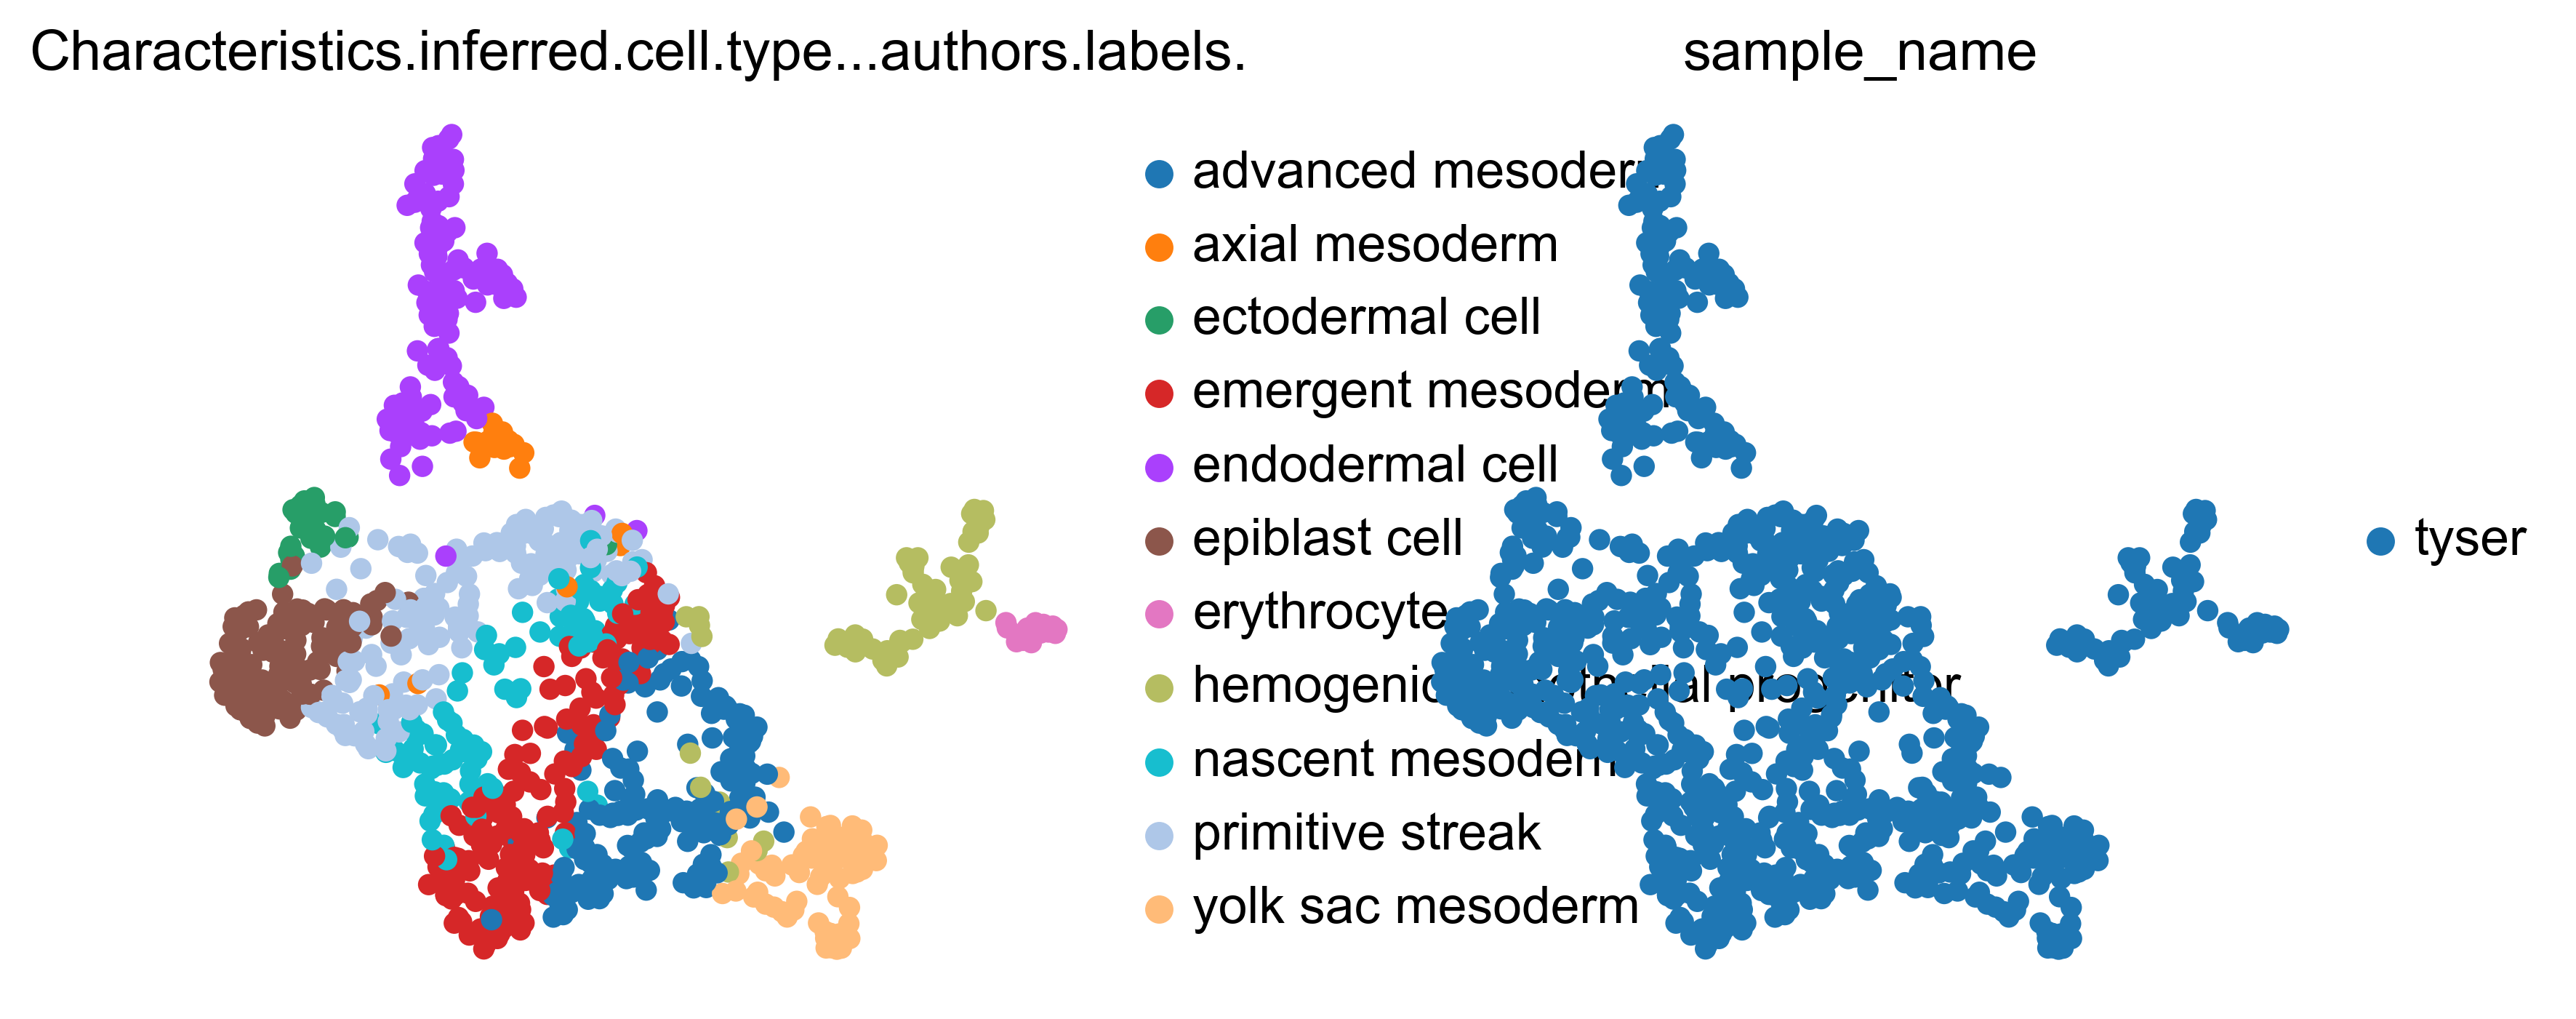

In [37]:
sc.pp.neighbors(hips)
sc.tl.umap(hips)


sc.pl.umap(hips, color=['Characteristics.inferred.cell.type...authors.labels.', 'sample_name'], frameon=False)

In [38]:
# Lees de tyser-dataset
tyser = sc.read('dataset/hiPSC.h5ad')

# Controleer de overlap van genen
missing_genes = [gene for gene in hips.var_names if gene not in tyser.var_names]
print(f"Aantal genen in hips die niet in tyser staan: {len(missing_genes)}")
print("Ontbrekende genen:", missing_genes)


Aantal genen in hips die niet in tyser staan: 136
Ontbrekende genen: ['ABCA10', 'ACMSD', 'ACSL5', 'AGXT2', 'ALB', 'APOC3', 'BBOX1', 'BLNK', 'BMX', 'C1QA', 'C1QB', 'C1QC', 'C3AR1', 'C6', 'C8A', 'C8B', 'C9', 'CACNG3', 'CCL22', 'CCL3L3', 'CCR3', 'CCR4', 'CD180', 'CD40LG', 'CD80', 'CETP', 'CGB5', 'CGB8', 'CHRM5', 'CHRNB3', 'CLDN22', 'CTGF', 'CX3CR1', 'CYBB', 'CYP2W1', 'CYP4B1', 'CYP4F2', 'DBH', 'DEFB104A', 'ENPP7', 'F2RL3', 'FCGR1A', 'FCGR2B', 'FMO3', 'FPR1', 'GABRA6', 'GATA1', 'GBA3', 'GBP5', 'GLRA2', 'GLYAT', 'GP9', 'GPR65', 'GPX1', 'HAL', 'HBB', 'HBD', 'HBE1', 'HCAR3', 'HK3', 'HMGCS2', 'HRG', 'HTR5A', 'IL1RN', 'IL2RG', 'IL3', 'ITGAL', 'KCNJ16', 'KCNV2', 'LILRA1', 'LILRB2', 'LIPC', 'LY86', 'LYVE1', 'MBOAT4', 'MC3R', 'MMP13', 'MMRN1', 'MPL', 'MUC6', 'MYBPC1', 'NLRC4', 'NMUR2', 'NPPA', 'NPSR1', 'NR0B2', 'NTSR2', 'OAS2', 'OLR1', 'OR2A42', 'OR2L13', 'OR2W3', 'OR3A1', 'OR51E1', 'OR51E2', 'OR51L1', 'OR6V1', 'OR8K1', 'PIK3CG', 'PIK3R6', 'PLA2G16', 'PLA2G4D', 'PLEK', 'PLG', 'PLXNB3', 'PNLIPRP2',

c:\Users\Mick\PycharmProjects\BPEXA\in_house_data\venv\in-house\.venv\Lib\site-packages\anndata\compat\__init__.py:358: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [ ]:
# Filter genen die aanwezig zijn in beide datasets
common_genes = [gene for gene in hips.var_names if gene in tyser.var_names]

# Pas de filtering toe op beide datasets
hips = hips[:, common_genes].copy()
tyser = tyser[:, common_genes].copy()  


In [40]:
kang = sc.read('dataset/hiPSC.h5ad')[:, hips.var_names].copy()

c:\Users\Mick\PycharmProjects\BPEXA\in_house_data\venv\in-house\.venv\Lib\site-packages\anndata\compat\__init__.py:358: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [41]:
# Controleer of var_names overeenkomen
print("Aantal genen in beide datasets na filtering:", len(common_genes))
print("Zijn genen nu identiek?", np.array_equal(hips.var_names, tyser.var_names))


Aantal genen in beide datasets na filtering: 1841
Zijn genen nu identiek? True


In [42]:
q_intr_cvae = sca.models.EXPIMAP.load_query_data(kang, intr_cvae)

Query data is missing expression data of  136  genes which were contained in the reference dataset.
The missing information will be filled with zeroes.


c:\Users\Mick\PycharmProjects\BPEXA\in_house_data\venv\in-house\.venv\Lib\site-packages\anndata\_core\anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 4694 × 1977
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'run', 'sample_name', 'percent.mt', 'percent.dissoc', 'RNA_snn_res.0.3', 'seurat_clusters', 'RNA_snn_res.0.22'


KeyError: 'Characteristics.inferred.cell.type...authors.labels.'